# **SIMPLE NEURAL NETWORK LAB**
With this notebook we are going to explore the basics about the hyper parameter tuning in a simple neural network with keras and tensowflow. To do so, we will use the fashion MNIST from keras that can be explored and get more info [here](https://github.com/zalandoresearch/fashion-mnist). 

So here, we are going to cover
* Basic hyper parameter tuning for a neural network
* Overfitting study case
* How to improve a basic model


In [ ]:
# General use
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Machine Learning
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import EarlyStopping


Let's define some methods that will be useful later when we present the results 

In [ ]:

def plot_acc(history, title="Model Accuracy"):
    '''
    Plot the accuracy per epoch got in the training
    '''
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
  '''
  Plot the loss per epoch got in the training
  '''
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
  '''
  Compares two losses from two different trainings with name1 and name2
  '''
  plt.plot(history1.history['loss'], color="green")
  plt.plot(history1.history['val_loss'], 'r--', color="green")
  plt.plot(history2.history['loss'], color="blue")
  plt.plot(history2.history['val_loss'], 'r--', color="blue")
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
  plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
  '''
  Compares two accuracies from two different trainings with name1 and nam2
  '''
  plt.plot(history1.history['acc'], color="green")
  plt.plot(history1.history['val_accuracy'], 'r--', color="green")
  plt.plot(history2.history['accuracy'], color="blue")
  plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
  plt.show()


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='MATRIZ CONFUSIÓN',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Credits to Keras
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

## **1. LOAD DATASET**
We can download such dataset directly from [keras](https://www.kaggle.com/zalando-research/fashionmnist), and split right away in training and test.

In [ ]:
# We load the data directly from keras
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# 1.1. Data Exploration
So we have a dataset with 60000 images where each one has a dimension of 28x28. In the dataset we got 10000 items (images) with the same shape as in the training dataset.

Alongside, and if we have a look to the dataset documentation previously mentioned we can see it's possible to distiguish between a certain amount of fashion items, and **that's what defines a classification problem** (which surprise, is our case).
In classification, the goals is being able to identify which class belongs the input to.

To be able to manage our data correctly we turn the class-arrayf (*Y*) into categorical.

In [ ]:
# We explore the data we got
print("Training: {}\nTest: {}".format(trainX.shape, testX.shape))

# Get also the clases, encoding it to categorical
trainY_cat = to_categorical(trainY)
testY_cat = to_categorical(testY)
print("\nClasses: {}".format(trainY_cat.shape))

Training: (60000, 28, 28)
Test: (10000, 28, 28)

Classes: (60000, 10)


and map it accordingly for a better representation


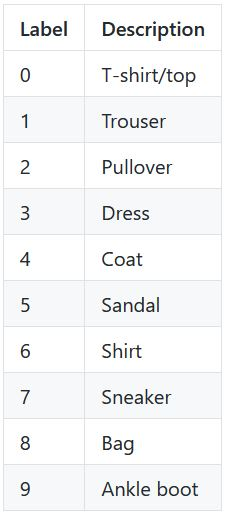

In [ ]:
# We map the clases for a better representation
class_names = {
0: 	'T-shirt/top',
1:	'Trouser',
2:	'Pullover',
3:	'Dress',
4: 	'Coat',
5:	'Sandal',
6:	'Shirt',
7:	'Sneaker',
8:	'Bag',
9:	'Ankle boot'
}

# 1.2 Data Preview

In [ ]:
def plot_item(item):
  '''
  Displays just one item from the dataset
  '''
  plt.figure()
  plt.imshow(item)
  plt.show()


def plot_sample(size, dim = 5):
  '''
  Display a sub dataset from the original one
  '''
  plt.figure(figsize = (dim, dim))
  cols = size/dim
  for i in range (size):
    plt.subplot(dim, cols, i+1)
    plt.imshow(trainX[i])
  plt.show()


def plot_distribution():
  '''
  Plots the distribution of every class
  '''
  plt.figure(figsize = (10,6))
  fashion = list(class_names.values())
  # We user the raw data (no categorical) to count them up
  unique, count = np.unique(trainY, return_counts = True)

  plt.bar(fashion, count)
  plt.xlabel('fashion name')
  plt.ylabel('number')
  plt.show()


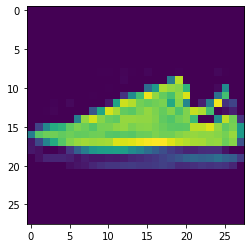

In [ ]:
# Visualize just one item
plot_item(trainX[6])

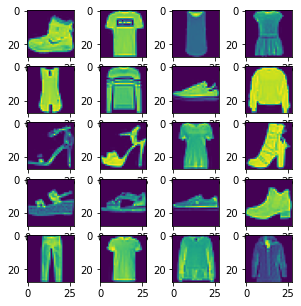

In [ ]:
# Visualize a subset from the original dataset spcifying the number of item
plot_sample(20)

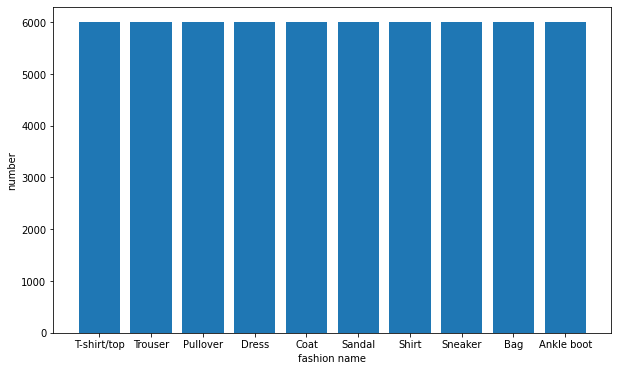

In [ ]:
# Let's see the distribution of the data
plot_distribution()

##**2. THE MODEL**
# 2.1 Define the architectures


### 2.1.1 Model 1


In [ ]:
# Define model n1
n_classes = trainY_cat.shape[1]
model1 = Sequential()
model1.add(Flatten(input_shape =(28,28) ))
model1.add(Dense(128, activation='sigmoid'))
model1.add(Dense (64, activation='sigmoid'))
model1.add(Dense(n_classes, activation='softmax'))

### 2.1.2 Model 2

In [ ]:
# Rehape the training data to have only one channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# Make it easier te convergence 
trainX = trainX/255
testX = testX/255

In [ ]:
# Define model n2
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape= trainX[1].shape ))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense (64, activation='relu'))
model2.add(Dense(n_classes, activation = 'softmax'))

### 2.1.3 Model 3

In [ ]:
# Define model n3
model3 = Sequential()
model3.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),
                  input_shape= trainX[1].shape ))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense (64, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(n_classes, activation = 'softmax'))

# 2.2 Compilation


> TODO: explain 
> * why categorical_crossentropy in loss
> * why we are using sgd as optimizer



In [ ]:
model1.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model2.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model3.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## **3. RUN AND EVALUATE**

# 3.1. Model 1
## 3.1.1  Fit Model 1



> EXPLAIN:
> this is the simplest but not the best accuracy. 
> Get the least overfitting though 





In [ ]:
# Define number of epochs and batch size
epochs = 20
batch_size = 64

# Train the model 1
history1 = model1.fit(trainX, trainY_cat,
           epochs = epochs,
           batch_size = batch_size,
           validation_split = 0.2)


Epoch 1/20
750/750 [==============================] - 2s 3ms/step - loss: 1.8032 - accuracy: 0.5546 - val_loss: 1.3855 - val_accuracy: 0.6834
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 1.1490 - accuracy: 0.7154 - val_loss: 0.9670 - val_accuracy: 0.7454
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.8695 - accuracy: 0.7581 - val_loss: 0.7916 - val_accuracy: 0.7663
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.7388 - accuracy: 0.7771 - val_loss: 0.6969 - val_accuracy: 0.7887
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.6648 - accuracy: 0.7917 - val_loss: 0.6413 - val_accuracy: 0.7930
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.6122 - accuracy: 0.8026 - val_loss: 0.5993 - val_accuracy: 0.7977
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5799 - accuracy: 0.8092 - val_loss: 0.5771 - val_accuracy: 0.8087
Epoch 

## 3.1.2 Evaluate

In [ ]:
model1.evaluate(testX, testY_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.5399 - accuracy: 0.8142


[0.539932131767273, 0.8141999840736389]

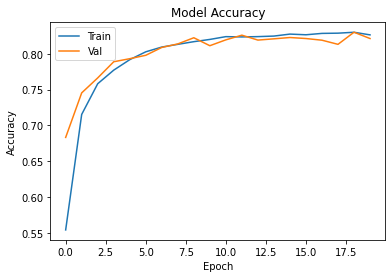

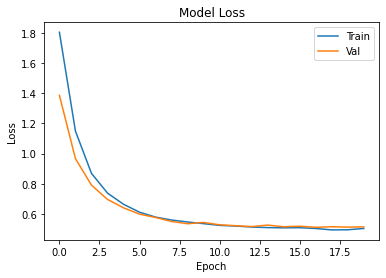

In [ ]:
plot_acc(history1)
plot_loss(history1)

# 3.2 Model 2
## 3.2.1 Fit Model 2

In [ ]:
# Define number of epochs and batch size
epochs = 20
batch_size = 64

# Train the model 2
history2 = model2.fit(trainX, trainY_cat,
           epochs = epochs,
           batch_size = batch_size,
           validation_split = 0.2)

Epoch 1/20
750/750 [==============================] - 19s 26ms/step - loss: 0.6493 - accuracy: 0.7744 - val_loss: 0.5020 - val_accuracy: 0.8253
Epoch 2/20
750/750 [==============================] - 19s 26ms/step - loss: 0.4631 - accuracy: 0.8370 - val_loss: 0.4557 - val_accuracy: 0.8402
Epoch 3/20
750/750 [==============================] - 19s 26ms/step - loss: 0.4155 - accuracy: 0.8550 - val_loss: 0.4019 - val_accuracy: 0.8583
Epoch 4/20
750/750 [==============================] - 19s 26ms/step - loss: 0.3875 - accuracy: 0.8636 - val_loss: 0.3739 - val_accuracy: 0.8684
Epoch 5/20
750/750 [==============================] - 19s 26ms/step - loss: 0.3671 - accuracy: 0.8696 - val_loss: 0.3966 - val_accuracy: 0.8556
Epoch 6/20
750/750 [==============================] - 20s 26ms/step - loss: 0.3517 - accuracy: 0.8771 - val_loss: 0.3527 - val_accuracy: 0.8758
Epoch 7/20
750/750 [==============================] - 20s 26ms/step - loss: 0.3372 - accuracy: 0.8798 - val_loss: 0.3678 - val_accuracy:

## 3.2.2 Evaluate

In [ ]:
model2.evaluate(testX, testY_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.2904 - accuracy: 0.8927


[0.29041916131973267, 0.8927000164985657]

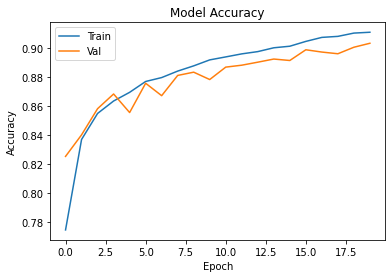

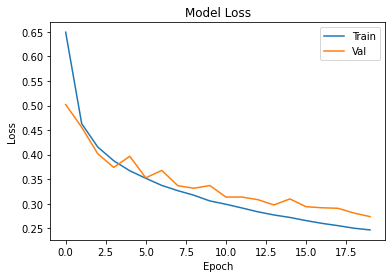

In [ ]:
plot_acc(history2)
plot_loss(history2)

In [ ]:
# Train the model 3
callback = [EarlyStopping(monitor='val_loss', patience=5)]

history3 = model3.fit(trainX, trainY_cat,
           epochs = epochs,
           batch_size = batch_size,
           callbacks = callback,
           validation_split = 0.2)

Epoch 1/20
750/750 [==============================] - 23s 31ms/step - loss: 0.5619 - accuracy: 0.8127 - val_loss: 0.4041 - val_accuracy: 0.8584
Epoch 2/20
750/750 [==============================] - 23s 31ms/step - loss: 0.3971 - accuracy: 0.8671 - val_loss: 0.3609 - val_accuracy: 0.8731
Epoch 3/20
750/750 [==============================] - 23s 30ms/step - loss: 0.3508 - accuracy: 0.8819 - val_loss: 0.3131 - val_accuracy: 0.8916
Epoch 4/20
750/750 [==============================] - 23s 30ms/step - loss: 0.3253 - accuracy: 0.8899 - val_loss: 0.3001 - val_accuracy: 0.8963
Epoch 5/20
750/750 [==============================] - 23s 30ms/step - loss: 0.3048 - accuracy: 0.8973 - val_loss: 0.2941 - val_accuracy: 0.8975
Epoch 6/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2907 - accuracy: 0.9010 - val_loss: 0.2995 - val_accuracy: 0.8957
Epoch 7/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2767 - accuracy: 0.9071 - val_loss: 0.2791 - val_accuracy:

In [ ]:
model3.evaluate(testX, testY_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.2859 - accuracy: 0.9058


[0.2859379053115845, 0.9057999849319458]

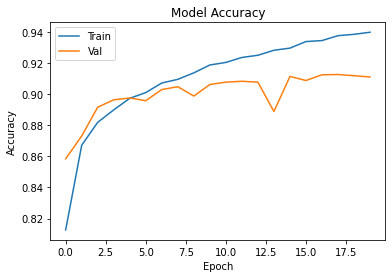

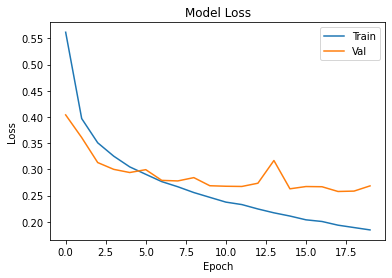

In [ ]:
plot_acc(history3)
plot_loss(history3)